# Analysis for Continuous Improvement

Author Name: Vivian Avery

9-digit PID: 730309871

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should use more programming examples in classes because this will help the students to understand the material better, which will in turn benefit the societal workforce.
2. The course should contain in-class examples related to a wide variety of disciplines because there are many majors represented in addition to Computer Science.
3. Office hours should be available on zoom on some days, as this will make it easier for students to attend, and potentially help UTAs who also have busy schedules.
4. The asynchronous lectures should always include some coding, as actually writing code is the best way for students to learn the concepts.
5. The Coding assignments should be more straightforward so that the instructional team doesn't have to spend as much time grading them.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: Office hours should be available on zoom on some days, as this will make it easier for students to attend, and potentially help UTAs who also have busy schedules.

2. Suggestion for how to collect data to support this idea in the future: A survey question could directly ask about the format of office hours and tutoring. It could be helpful to survey UTAs on this question. 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: The course should contain in-class examples related to a wide variety of disciplines because there are many majors represented in addition to Computer Science.

2. This idea is more valuable than the others brainstormed because: Computer programming is only becoming more and more important as time goes on. Many of the students will need to use it in their careers, but they will be using it in a wide variety of fields. 


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [86]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [87]:
# TODO: You complete the code blocks from here forward!
from data_utils import read_csv_rows, columnar, head, select, concat, count, high_values

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [88]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

We start by selecting the answers to the survey questions which were related to majors.

In [89]:
data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
data_cols: dict[str, list[str]] = columnar(data_rows)
major_data: dict[str, list[str]] = select(data_cols, ["comp_major", "primary_major", "data_science"])

print(len(data_rows))
head(major_data, 5)

620


{'comp_major': ['No', 'No', 'Yes - BA'],
 'primary_major': ['Mathematics', 'Mathematics', 'Computer Science'],
 'data_science': ['No', 'Yes', 'No']}

Now we count up the number of students with each major.

In [90]:
major_counts: dict[str, int] = count(major_data["primary_major"])

Next, we sort by the most common majors. Since there are 620 responses total, common will be at least 5%, or more than 31 students

In [91]:
most_common: dict[str, int] = high_values(major_counts, 31)

print(most_common)

{'Computer Science': 223, 'Neuroscience': 55, 'Psychology': 70, 'Economics': 50, 'Biology': 60, 'Business': 35}


Now we will determine what percentage of the class the majors above represent.

In [92]:
print(sum(most_common.values()) / len(data_rows))


0.7951612903225806


There are some similarities between these majors, so I am going to group them into Life Sciences, Economics, and computer science, and calculate how much each of these groups represents.

In [93]:
computer_science: int = most_common["Computer Science"]
life_sciences: int = most_common["Biology"] + most_common["Neuroscience"] + most_common["Psychology"]
economics: int = most_common["Economics"] + most_common["Business"]
comp_sci_percent: float = most_common["Computer Science"] / len(data_rows)
life_sciences_percent: float = (life_sciences) / len(data_rows)
economics_percent: float = (economics) / len(data_rows)

grouped_majors: dict[str, float] = {"computer science": computer_science, "Life Sciences": life_sciences, "Economics and Business": economics}

print(comp_sci_percent, life_sciences_percent, economics_percent)

0.3596774193548387 0.29838709677419356 0.13709677419354838


## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

I predicted that there are a variety of majors in this class, so a variety of disciplines should be represented. In reality, six majors represented 80% of the students, so my hypothesis was not entirely right, although there are many majors represented other than just Computer Science. Additionally, some of these common majors were related, such as psychology and neuroscience, and business and economics. Therefore, it would be beneficial for the majority of the class if the coding activities focused on analyzing data related to the life sciences and business, as 30% are life sciences majors and 14% are business or economics majors. These students will probably need to use data analysis in their careers, so this would create a lot of value for these students. However, because no single major dominates the class, there should still be other types of assignments that focus on other fields to give students experience with a lot of different scenarios.

Although a majority of the students are focused on these areas, there are still 20% with other majors. Many of these students will probably also use coding in their careers, so they would also benefit from assignments focused in their fields. However, each individual major represents too small of a section of the course to prioritize over larger sections.

My analysis relies on the assumption that people's majors are always correlated with their career goals, but this may not always be the case. This idea could be refined further by asking students about their career goals, so that it can be determined what sorts of data analysis or other coding assignments would be most useful to them.

<BarContainer object of 3 artists>

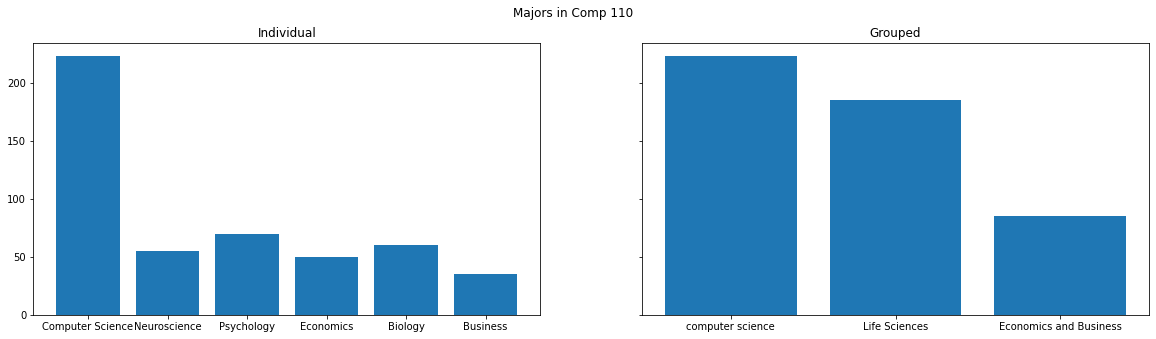

In [94]:
from matplotlib import pyplot as pyplot

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle("Majors in Comp 110")


axes[0].set_title("Individual")
axes[0].bar(most_common.keys(), most_common.values())
# axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Grouped")
axes[1].bar(grouped_majors.keys(), grouped_majors.values())